In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from scipy.io import FortranFile
import numpy as np
import os
import sys
# RASCAS 
import lya_utils as lya

In [2]:
# Function taken fron ramses utils, by Trebitsch & Rosdahl.

def readRamsesSEDs(sedDir):
    """Read SED in ramses format and return

    Parameters:
    ----------------------------------------------------------------------
    sedDir: Directory containing the SED tables
    """
    # Read metallicity bins
    ZFile = open(sedDir+'/metallicity_bins.dat', 'r')
    nZ = eval(ZFile.readline())
    ZBins = []
    for Z in range(0,nZ): ZBins.append(eval(ZFile.readline()))
    ZFile.close()

    # Read age bins
    ageFile = open(sedDir+'/age_bins.dat', 'r')
    nAge = eval(ageFile.readline())
    ageBins = []
    for age in range(0,nAge): ageBins.append(eval(ageFile.readline()))
    ageFile.close()

    # Read wavelength bins and spectra
    sedFile = FortranFile(sedDir+'/all_seds.dat','r')
    nLambda = sedFile.read_ints()[0]
    lambdaBins = sedFile.read_reals()
    spectra = np.empty([nLambda,nAge,nZ])
    for iZ in range(0,nZ):
        for iAge in range(0,nAge):
            spectrum = sedFile.read_reals()
            spectra[:,iAge,iZ] = spectrum

    return {'ZBins':ZBins, 'ageBins':ageBins, 'lambdaBins':lambdaBins,'spectra':spectra}




In [3]:
ssp = readRamsesSEDs('/Users/blaizot/Documents/Astro/Dev/muse-svn/data/SED_LIBS/bc03/')

# Write a file with luminosities at 1600 A, for all ages and metalliticies

In [ ]:
plt.figure(figsize=(12,10))
for i in range(0,150,10):
    plt.plot(ssp['lambdaBins'],ssp['spectra'][:,i,1]*2e33,label="%.4f Myr"%(ssp['ageBins'][i]*1e-6))

plt.xlim(900,2500)
plt.ylim(1e28,1e34)
plt.xlabel(r'$\lambda \ [\AA]$',fontsize=15)
plt.ylabel(r'$F_{\lambda} \ [erg / s / \AA / M_\odot]$',fontsize=15)
plt.yscale('log')
plt.axvline(1600,alpha=0.3,color='orange',linewidth=5,label=r'$\lambda = 1600 \AA$')
plt.axvline(1216,linestyle='--',alpha=0.3,color='red',linewidth=4,label=r'$\lambda_{Ly\alpha}$')
plt.legend()

In [ ]:
# extract values at 1600A 
i1600 = np.where(abs(ssp['lambdaBins']-1600) == min(abs(ssp['lambdaBins']-1600)))[0][0]
f1600 = ssp['spectra'][i1600,:,:] * 2e33 # erg/s/Msun/A
# save these to some ascii file 
f = open('F1600.txt','w')
f.write("# Flux values at 1600 Angstrom, in erg/s/Msun/A. These are generated from BC03 models. \n")
f.write("# First line is nages and nmets. Then come ages [Myr], then metallicities [absolute] (lines 2 and 3) \n")
f.write("# Then each line has F1600 [erg/s/Msun/A] for all ages and one metallicity \n")
nage = len(ssp['ageBins'])
nmet = len(ssp['ZBins'])
f.write("%i %i \n"%(nage,nmet))
for iage in range(nage): f.write("%.8e "%(ssp['ageBins'][iage]*1e-6))
f.write("\n")
for imet in range(nmet): f.write("%.8e "%(ssp['ZBins'][imet]))
f.write("\n")
for imet in range(nmet):
    for iage in range(nage):f.write("%.8e "%(f1600[iage,imet]))
    f.write("\n")
f.close()


# Write a file with luminosities at 5510 A (V band), for all ages and metalliticies

In [ ]:
plt.figure(figsize=(12,10))
for i in range(0,150,10):
    plt.plot(ssp['lambdaBins'],ssp['spectra'][:,i,1]*2e33,label="%.4f Myr"%(ssp['ageBins'][i]*1e-6))

plt.xlim(4500,6000)
plt.ylim(1e29,1e32)
plt.xlabel(r'$\lambda \ [\AA]$',fontsize=15)
plt.ylabel(r'$F_{\lambda} \ [erg / s / \AA / M_\odot]$',fontsize=15)
plt.yscale('log')
plt.axvline(5510,alpha=0.3,color='orange',linewidth=5,label=r'$\lambda = 5510 \AA$')
plt.legend()

In [ ]:
# extract values at 5510A 
i5510 = np.where(abs(ssp['lambdaBins']-5510) == min(abs(ssp['lambdaBins']-5510)))[0][0]
f5510 = ssp['spectra'][i5510,:,:] * 2e33 # erg/s/Msun/A
# save these to some ascii file 
f = open('F5510.txt','w')
f.write("# Flux values at 5510 Angstrom, in erg/s/Msun/A. These are generated from BC03 models. \n")
f.write("# First line is nages and nmets. Then come ages [Myr], then metallicities [absolute] (lines 2 and 3) \n")
f.write("# Then each line has F5510 [erg/s/Msun/A] for all ages and one metallicity \n")
nage = len(ssp['ageBins'])
nmet = len(ssp['ZBins'])
f.write("%i %i \n"%(nage,nmet))
for iage in range(nage): f.write("%.8e "%(ssp['ageBins'][iage]*1e-6))
f.write("\n")
for imet in range(nmet): f.write("%.8e "%(ssp['ZBins'][imet]))
f.write("\n")
for imet in range(nmet):
    for iage in range(nage):f.write("%.8e "%(f5510[iage,imet]))
    f.write("\n")
f.close()

# Write a file with Lya luminosities for all ages and metallicities.
Here, we compute the number of Lyman continuum photons and use a typical value alpha_B = 0.68 to convert them into Lya photons.

In [ ]:
plt.figure(figsize=(12,12))

# save these to some ascii file 
f = open('FLya.txt','w')
f.write("# Lya luminosities, in erg/s/Msun. These are generated from BC03 models, assuming alpha_B=0.68. \n")
f.write("# First line is nages and nmets. Then come ages [Myr], then metallicities [absolute] (lines 2 and 3) \n")
f.write("# Then each line has FLya [erg/s/Msun] for all ages, at a given metallicity. \n")
nage = len(ssp['ageBins'])
nmet = len(ssp['ZBins'])
f.write("%i %i \n"%(nage,nmet))
for iage in range(nage): f.write("%.8e "%(ssp['ageBins'][iage]*1e-6))
f.write("\n")
for imet in range(nmet): f.write("%.8e "%(ssp['ZBins'][imet]))
f.write("\n")

# comute number of Lyman continuum photons
lylim  = 912. # [Angstrom]
ilylim = np.where(abs(ssp['lambdaBins']-lylim) == min(abs(ssp['lambdaBins']-lylim)))[0][0]
lbds   = ssp['lambdaBins'][:ilylim+1]

for imet in range(nmet):
    x,y = [],[]
    for iage in range(nage):
        fly    = np.ravel(ssp['spectra'][0:ilylim+1,iage,imet])
        fly = fly * lbds
        nlyc = np.trapz(fly,lbds)
        nlyc = nlyc * 1.0e-13 / lya.h_cgs / (lya.clight*1e-5) # use same formulae as St Charlot.
        nlyc = np.log10(nlyc)+33.5827 # scale with solar lum
        nlya = nlyc + np.log10(0.68)
        x.append(ssp['ageBins'][iage])
        y.append(nlya)
        # we want erg/s -> multiply by h nu 
        llya = 10.**nlya * (lya.h_cgs * lya.nu0)
        f.write("%.8e "%(llya))
    f.write("\n")
    plt.plot(x,y,label='Z = %s'%(ssp['ZBins'][imet]))

f.close()
plt.legend()
plt.xscale('log')
plt.ylabel(r'$\dot{N}_{\rm Ly\alpha} \ [s^{-1} M_\odot^{-1}]$',fontsize=20)
plt.xlabel('age [yr]',fontsize=13)

# Make power-law fits to SEDs arou nd Lya
WARNING: the method implemented below works only for stellar populations younger than ~ 2 Gyr. Older populations are not so much affected by deep Lya absorption but have a change of slope in the continuum at ~ 1300A which breaks our fit. For these, a simple fit on another lambda-range works fine. 

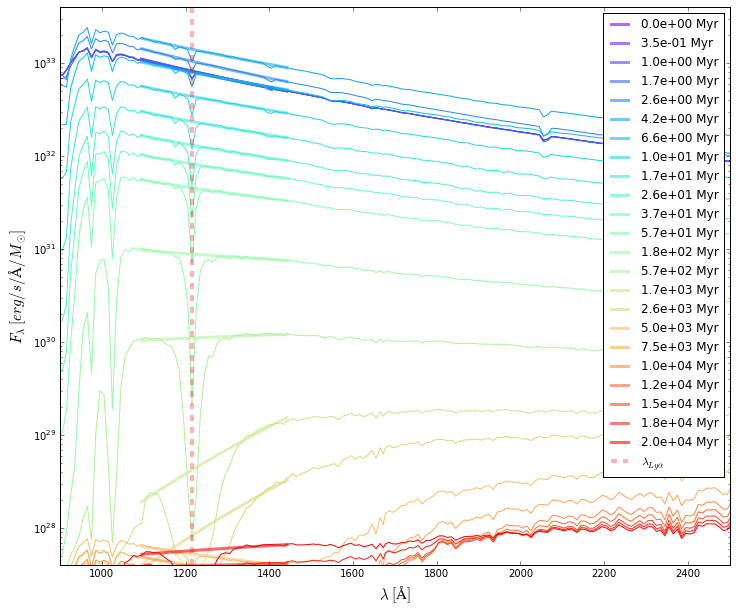

In [4]:
# define fit parameters
llow = 1100
ilow = np.where(abs(ssp['lambdaBins']-llow) == min(abs(ssp['lambdaBins']-llow)))[0][0]
lup  = 1450
iup  = np.where(abs(ssp['lambdaBins']-lup) == min(abs(ssp['lambdaBins']-lup)))[0][0]
flux = ssp['spectra'][ilow:iup,:,:] * 2e33 # erg/s/Msun/A
loglambda = np.log10((ssp['lambdaBins'])[ilow:iup])
logf      = np.log10(flux)
lambda0   = 1216.


# save these to some ascii file 
f = open('PowerLawCont1216.txt','w')
f.write("# Continuum power-law fits, from %f to %f A. These are in the form F_l = F_0 * (l/l0)^beta, with l0 = %f. \n"%(llow,lup,lambda0))
f.write("# First line is nages and nmets. Then come ages [Myr], then metallicities [absolute] (lines 2 and 3), and l0 [A] (line 4) \n")
f.write("# Then consecutive lines (corresponding to a single metallicity) have has F_0 [erg/s/A/Msun] for all ages, beta for all ages. \n")
nage = len(ssp['ageBins'])
nmet = len(ssp['ZBins'])
f.write("%i %i \n"%(nage,nmet))
for iage in range(nage): f.write("%.8e "%(ssp['ageBins'][iage]*1e-6))
f.write("\n")
for imet in range(nmet): f.write("%.8e "%(ssp['ZBins'][imet]))
f.write("\n")
f.write("%.8e \n"%(lambda0))

# prepare plot 
plt.figure(figsize=(12,10))
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 221))

for imet in range(nmet):
    x,y = [],[]
    F_0s = ""
    betas = ""
    for iage in range(nage):
        p = np.polyfit(loglambda,logf[:,iage,imet],deg=1)#,w=f[:,i,1]**2)
        fit = 10.**( p[1] + p[0]*loglambda) 
        # remove the strong Lya absorption in the SEDs.
        ii = np.where(flux[:,iage,imet] > 0.8*fit)[0]
        p = np.polyfit(loglambda[ii],logf[ii,iage,imet],deg=1)
        fit = 10.**( p[1] + p[0]*loglambda) 
        # again, with stronger constraint
        ii = np.where(flux[:,iage,imet] > 0.95*fit)[0]
        p = np.polyfit(loglambda[ii],logf[ii,iage,imet],deg=1)
        fit = 10.**( p[1] + p[0]*loglambda) 
        # extract fit parameters
        beta   = p[0]
        logF_0 = p[1]+beta*np.log10(lambda0)
        F_0    = 10.**logF_0  # in erg/s/A/Msun
        F_0s = "%s %.8e"%(F_0s,F_0)
        betas = "%s %.8e"%(betas,beta)


        # check fit with plot
        if imet == 1 and iage%10==0:
            plt.plot(ssp['lambdaBins'],ssp['spectra'][:,iage,imet]*2e33,color=colors[iage])
            fit = F_0 * (10.**loglambda/lambda0)**beta
            plt.plot(10.**loglambda,fit,color=colors[iage],linewidth=3,
                     alpha=0.6,label="%.1e Myr"%(ssp['ageBins'][iage]*1e-6))
            
    f.write("%s \n"%(F_0s))
    f.write("%s \n"%(betas))

f.close()
plt.xlim(900,2500)
plt.ylim(4e27,4e33)
plt.xlabel(r'$\lambda \ [\AA]$',fontsize=15)
plt.ylabel(r'$F_{\lambda} \ [erg / s / \AA / M_\odot]$',fontsize=15)
plt.yscale('log')
plt.axvline(1216,linestyle='--',alpha=0.3,color='red',linewidth=4,label=r'$\lambda_{Ly\alpha}$')
plt.legend()
